In [1]:
from config import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [25]:
def getLog(camp=0, c0=32, inputPath=None):
  if inputPath = None:
    inputPath = logPath + str(camp) + "/qlearning/v1-c0-" + str(c0) + ".txt"
  
  lines = []
  with open(inputPath) as f:
    lines = f.readlines()
  
  rewards = []
  clicks = []

  for line in lines[1:]:
    line = line.split('  ')
    reward = float(line[1].strip())
    click = int(line[2].strip())
    rewards.append(reward)
    clicks.append(click)
    
  rewards = np.array(rewards, dtype=float)
  clicks = np.array(clicks, dtype=int)
  return rewards, clicks

SyntaxError: invalid syntax (<ipython-input-25-d3303508042e>, line 2)

In [3]:
def getCost(rewards, clicks, scaling=100):
  cost = (clicks - rewards) * 100/scaling
  return cost

In [4]:
camp = campaigns[0]

In [5]:
savePath = plotPath + camp + "/"

In [33]:
matplotlib.rcParams.update({'font.size': 32})

### Plotting training time for c0=1/32

In [89]:
rewards, clicks = getLog(camp, 32)
frac_cost = getCost(rewards, clicks)

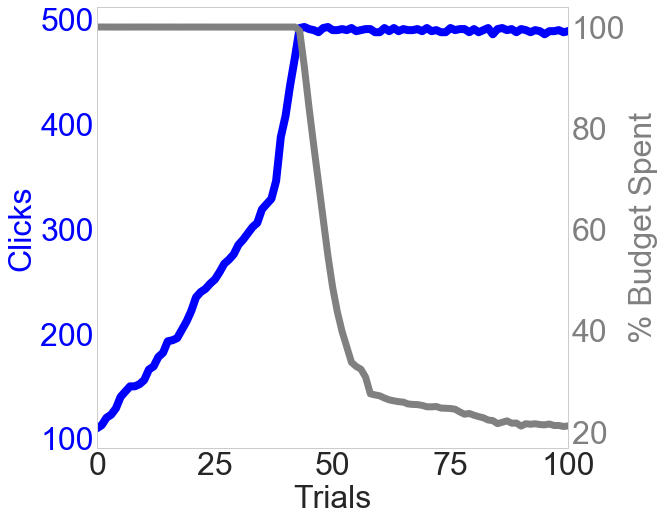

In [91]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(clicks, 'blue', linewidth=8)
ax1.set_xlabel('Trials')
ax1.set_xlim(0, 100)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='blue')
ax1.tick_params('y', colors='blue')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(frac_cost, 'gray', linewidth=7)
ax2.set_ylabel('% Budget Spent', color='gray')
ax2.tick_params('y', colors='gray')
ax2.grid(False)

fig.tight_layout()
plt.savefig(savePath + "Training", dpi=300)
plt.show()

### Plotting reward and cost across budgets

In [86]:
rewards = []
clicks = []
frac_costs = []
c0s = [32, 16, 8, 4]
for c0 in c0s:
  r, c = getLog(camp, c0)
  fc = getCost(r, c)
  rewards.append(r)
  clicks.append(c)
  frac_costs.append(fc)

In [87]:
def getBudgetString(c0):
  return "c0 = 1/" + str(c0)

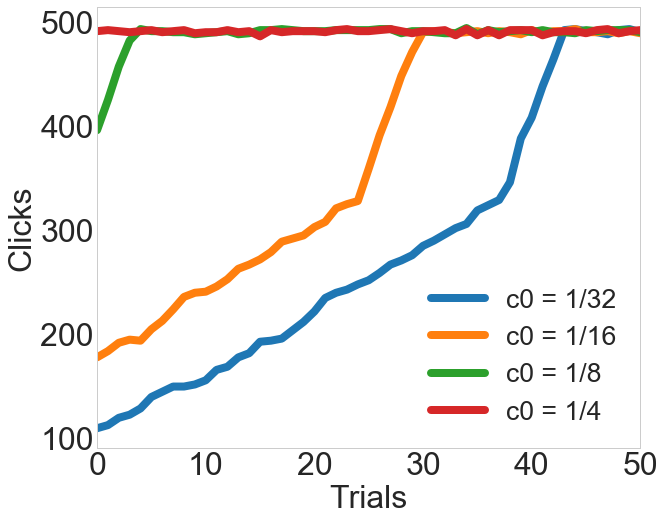

In [88]:
fig, ax = plt.subplots(figsize=(10,8))

for i, c in enumerate(clicks):
  ax.plot(c, label=getBudgetString(c0s[i]), linewidth=8)

ax.legend(fontsize="small")
ax.set_xlabel('Trials')
ax.set_xlim(0, 50)
# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Clicks')
ax.tick_params('y')
ax.grid(False)

fig.tight_layout()
plt.savefig(savePath + "clicksbudget", dpi=300)
plt.show()

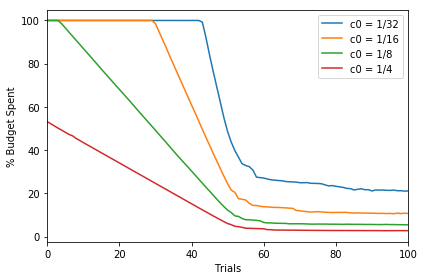

In [21]:
fig, ax = plt.subplots()

for i, fc in enumerate(frac_costs):
  ax.plot(fc, label=getBudgetString(c0s[i]))

ax.legend()
ax.set_xlabel('Trials')
ax.set_xlim(0, 100)
# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('% Budget Spent')
ax.tick_params('y')

fig.tight_layout()
plt.savefig(savePath + "costbudget", dpi=300)
plt.show()

### Bar plot of clicks

In [76]:
options = ['None', 'Reward', 'Epsilon', 'Log scale']
values = [13, 121, 331, 492]

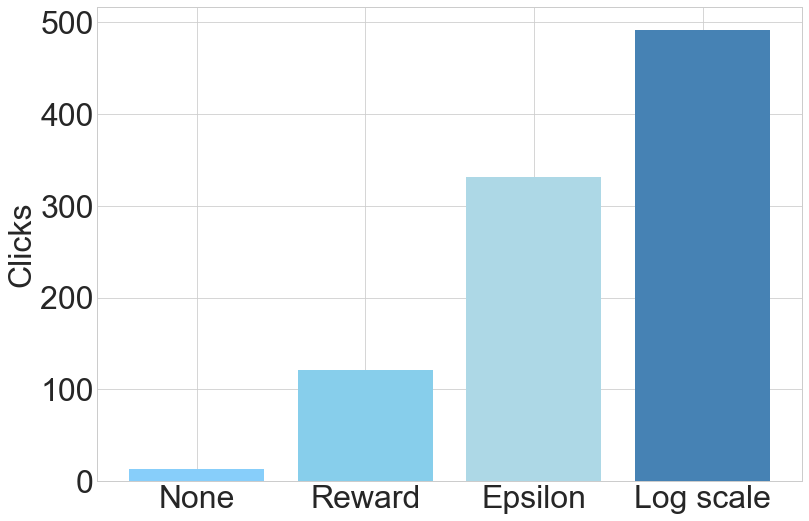

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Clicks')
plt.bar(options, values, color=['lightskyblue', 'skyblue', 'lightblue', 'steelblue'])
fig.tight_layout()
plt.savefig(savePath + "click_improvement", dpi=300)

### Heatmap of weights

In [83]:
def getWeights(camp):
  inputPath = logPath + str(camp) + "/qlearning/v2-weights.txt"
  
  lines = []
  with open(inputPath) as f:
    lines = f.readlines()
    
  data = np.zeros((2, 10))
  counts = np.ones((2, 10))
  for line in lines:
    line = line.split(' ')
    action = int(line[1])
    pctr = int(float(line[2][4:])) - 1
    weight = float(line[3])
    if action == 0:
      data[0, pctr] += weight
      counts[0, pctr] += 1
    else:
      data[1, pctr] += weight
      counts[1, pctr] += 1
    
      
  return data, counts

In [84]:
data, counts = getWeights(camp)

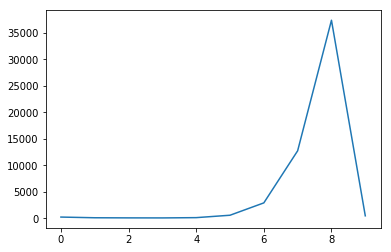

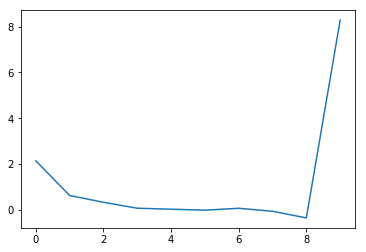

In [85]:
plt.plot(counts[1])
plt.figure()
plt.plot(data[1])